In [ ]:
import os
import tensorflow as tf
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# this installs the model optimizer addon
!pip install -U tensorflow-addons

import tensorflow_addons as tfa

!pip install split-folders tqdm

import splitfolders as sf

!pip install -q kaggle

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 9.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!kaggle datasets download sanikamal/rock-paper-scissors-dataset

 97% 439M/452M [00:03<00:00, 176MB/s]
100% 452M/452M [00:03<00:00, 141MB/s]


In [ ]:
!unzip rock-paper-scissors-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Rock-Paper-Scissors/train/paper/paper04-118.png  
  inflating: Rock-Paper-Scissors/train/paper/paper04-119.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-000.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-001.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-002.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-003.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-004.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-005.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-006.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-007.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-008.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-009.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-010.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-011.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-012.png  
  in

In [ ]:
 # partition the training set into train and val data
sf.ratio('./rock-paper-scissors/Rock-Paper-Scissors/train', output='./rock-paper-scissors/dataset', seed=1337, ratio=(.8, .2))

Copying files: 2520 files [00:01, 2092.64 files/s]


In [ ]:
# naming variables to the train and val paths
base_dir = './rock-paper-scissors/dataset'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [ ]:
# creating image data generator objects with augmentation
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    vertical_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    vertical_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical',
        shuffle=True)

val_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical',
        shuffle=True)

Found 2016 images belonging to 3 classes.
Found 504 images belonging to 3 classes.


In [ ]:
# Creating the convolutional neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Lazy Adam optimizer is generally used for the model compilation
model.compile(loss='categorical_crossentropy',
              optimizer=tfa.optimizers.LazyAdam(),
              metrics=['accuracy'])

model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=val_generator,
    validation_steps=6,
    verbose=2
)

Epoch 1/20
25/25 - 40s - loss: 1.1170 - accuracy: 0.3609 - val_loss: 1.1149 - val_accuracy: 0.2750 - 40s/epoch - 2s/step
Epoch 2/20
25/25 - 29s - loss: 1.0908 - accuracy: 0.3760 - val_loss: 1.0944 - val_accuracy: 0.4417 - 29s/epoch - 1s/step
Epoch 3/20
25/25 - 29s - loss: 1.0530 - accuracy: 0.4820 - val_loss: 1.1248 - val_accuracy: 0.3333 - 29s/epoch - 1s/step
Epoch 4/20
25/25 - 30s - loss: 0.8557 - accuracy: 0.5880 - val_loss: 0.6683 - val_accuracy: 0.7000 - 30s/epoch - 1s/step
Epoch 5/20
25/25 - 30s - loss: 0.5479 - accuracy: 0.7820 - val_loss: 0.3899 - val_accuracy: 0.8583 - 30s/epoch - 1s/step
Epoch 6/20
25/25 - 28s - loss: 0.3743 - accuracy: 0.8710 - val_loss: 0.2072 - val_accuracy: 0.9667 - 28s/epoch - 1s/step
Epoch 7/20
25/25 - 29s - loss: 0.2296 - accuracy: 0.9060 - val_loss: 0.1949 - val_accuracy: 0.9333 - 29s/epoch - 1s/step
Epoch 8/20
25/25 - 29s - loss: 0.2172 - accuracy: 0.9400 - val_loss: 0.1481 - val_accuracy: 0.9667 - 29s/epoch - 1s/step
Epoch 9/20
25/25 - 29s - loss: 0

In [ ]:
os.listdir('/content/rock-paper-scissors/dataset/train')

['rock', 'paper', 'scissors']

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 as cv
%matplotlib inline

hand_img = files.upload()

Saving testscissors01-16.png to testscissors01-16.png


1/1 [==============================] - 0s 51ms/step
[[6.0760844e-02 6.8530807e-04 9.3855393e-01]]
Your symbol is:


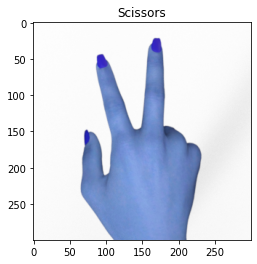

In [ ]:
for i in hand_img.keys():
    path = i
    img = cv.imread(i)
    plt.imshow(img)
    img = cv.resize(img,(150, 150))
    norm_image = cv.normalize(img, None, alpha = 0, beta = 1, norm_type = cv.NORM_MINMAX, dtype = cv.CV_32F)
    norm_image = norm_image.reshape((norm_image.shape[0], norm_image.shape[1], 3))

    case = np.asarray([norm_image])
    result = model.predict([case])
    print(result)
    print('Your symbol is:')
    predict = result.argmax()

if predict == 0:
    plt.title('Rock')
elif predict == 1:
    plt.title('Paper')
else:
    plt.title('Scissors')

In [ ]:
base_dir = './Rock-Paper-Scissors'
test_dir = os.path.join(base_dir, 'test')

test_gen = ImageDataGenerator(rescale=1./255)
test_data = test_gen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical',
        shuffle=True)

Found 372 images belonging to 3 classes.


In [ ]:
test_results = model.evaluate(test_data, batch_size=128)
print("test loss, test acc:", test_results)

19/19 [==============================] - 6s 291ms/step - loss: 0.2836 - accuracy: 0.8656
test loss, test acc: [0.28360462188720703, 0.8655914068222046]
